##P1.importar Librerias 


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

###Conversion de Celsius  a Fahrenheit


In [2]:
#creamos una funcion para convertir
def f_conv_cels_fah (p_celsius):
  fah= p_celsius*1.8 + 32
  return fah

print('50° Celsius= ',
      f_conv_cels_fah(50),
      '° Fahrenheit ')

50° Celsius=  122.0 ° Fahrenheit 


###Conversion de Fahrenheit a Celsius

In [3]:
#creamos una funcion para convertir
def f_conv_fah_cels (p_farin):
  celci= (p_farin -32) *5/9
  return celci

print('122° Fahrenheit= ',
      f_conv_fah_cels(122),
      '° Celsius ')

122° Fahrenheit=  50.0 ° Celsius 


##P2.importamos la BD 

In [4]:
data = pd.DataFrame()
data = pd.read_csv('https://raw.githubusercontent.com/michelBolivar/Deep_learning/main/Corte2/temperatura/temperatura.txt', encoding='utf-8')

In [5]:
data.head(10)


,Celsius,Fahrenheit
0,74,165.2
1,39,102.2
2,53,127.4
3,76,168.8
4,24,75.2
5,57,134.6
6,5,41.0
7,21,69.8
8,62,143.6
9,8,46.4


In [6]:
data_cel=data.drop(['Fahrenheit'], axis=1)
data_cel.head()

,Celsius
0,74
1,39
2,53
3,76
4,24


In [7]:
data_farin=data.drop(['Celsius'], axis=1)
data_farin.head()

,Fahrenheit
0,165.2
1,102.2
2,127.4
3,168.8
4,75.2


##P3.Creando Red Neuronal

crearemos 3 capas densas

In [8]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [20]:
capa_2 = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo_2 = tf.keras.Sequential([capa_2])

###3.1 Compilamos la red


*   Usaremos el optimizador ADAM
*   Definiremos una tasa de aprendizaje de 0.1



In [9]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [21]:
modelo_2.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

##P4.Entrenando

In [10]:
print("Comenzando entrenamiento...")
historial = modelo.fit(data_cel,data_farin, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


In [22]:
print("Comenzando entrenamiento...")
historial_2 = modelo_2.fit(data_farin,data_cel, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


###4.1Resultados Entrenamiento


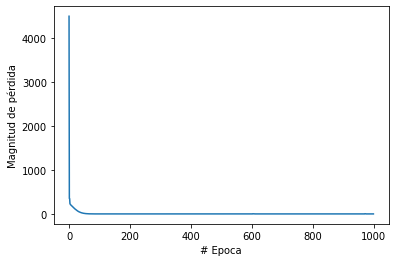

In [11]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

##P5.Prediccion

###Prediccion de Fahrenheit

In [26]:
v_celsius= 24
print("Hagamos una predicción!")
resul_IA   = modelo.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '°  = \n Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  24 °  = 
 Fahrenheit: 
IA:  [[75.2]] 
Regular:  75.2 
Dif %: [[0.]]


###Prediccion de Celsius

In [25]:
p_farin= 75.2
print("Hagamos una predicción!")
resul_IA   = modelo_2.predict([p_farin])
result_real= f_conv_fah_cels(p_farin)
dif        = 100-(resul_IA*100/result_real)
print('Fahrenheit= ',p_farin, '° = \n Celsius:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Fahrenheit=  75.2 ° = 
 Celsius: 
IA:  [[23.98023]] 
Regular:  24.0 
Dif %: [[0.08237457]]


##P6.Conociendo que sesgos y pesos resultantes 

In [13]:
print("Variables internas del modelo")
print('peso: ',capa.get_weights()[0])
print('sesgo: ',capa.get_weights()[1]) 

Variables internas del modelo
peso:  [[1.8]]
sesgo:  [31.999998]


In [24]:
print("Variables internas del modelo")
print('peso: ',capa_2.get_weights()[0])
print('sesgo: ',capa_2.get_weights()[1]) 

Variables internas del modelo
peso:  [[0.5553028]]
sesgo:  [-17.77854]


##P7.Mas Neuronas y mas capas 

###P7.1  Creamos un modelo con dos capas ocultas

In [14]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # capa DENSA con 3 neuronas y el entra información de 1 capa
oculta2 = tf.keras.layers.Dense(units=3)                   # capa DENSA con 3 neuronas
salida  = tf.keras.layers.Dense(units=1)                    # capa de salida con 1 neurona
#creamos el modelo con las 4 capas (recuerden 1 que la de la parametros no hace falta definirla)
modelo_v2 = tf.keras.Sequential([oculta1, oculta2, salida])

In [15]:
modelo_v2.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [16]:
print("Comenzando entrenamiento...")
historial_V2 = modelo_v2.fit(data_cel,data_farin, epochs=1000, verbose=False)
print("modelo_v2 entrenado!")

Comenzando entrenamiento...
modelo_v2 entrenado!


###P7.2 resultados del entrenamiento

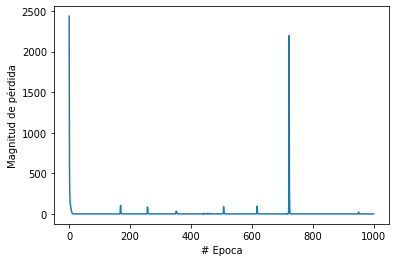

In [17]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial_V2.history["loss"])

###P7.3. conociendo que sesgos y pesos resultantes

In [18]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.44138217,  0.0807213 , -1.0278562 ]], dtype=float32), array([ 3.2754333, -4.136193 , -5.9992185], dtype=float32)]
[array([[ 0.17724156, -1.4347545 ,  0.29843646],
       [-0.52793056, -0.15950146, -0.05840732],
       [-0.10693173,  0.6359272 ,  1.5252141 ]], dtype=float32), array([ 0.8282281,  4.6095085, -9.671937 ], dtype=float32)]
[array([[ 0.02560127],
       [-0.03340441],
       [-1.0557222 ]], dtype=float32), array([13.198896], dtype=float32)]


###P7.4 Prediccion 

In [19]:
v_celsius= 24
print("Hagamos una predicción!")
resul_IA   = modelo_v2.predict([v_celsius])
result_real= f_conv_cels_fah(v_celsius)
dif        = 100-(resul_IA*100/result_real)
print('Celsius= ',v_celsius, '° = Fahrenheit:',
      '\nIA: ',resul_IA,
      '\nRegular: ',result_real,
      '\nDif %:',dif)

Hagamos una predicción!
Celsius=  24 ° = Fahrenheit: 
IA:  [[75.1978]] 
Regular:  75.2 
Dif %: [[0.00292206]]
